<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


The chance of the knight crossing the bridge safely is 60%.

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, because data changes probabilities. The posterior probability must be determined in order to determine the likelihood that the knight will cross safely given that he came across a troll. The knight's assertion that he has an 80% chance of making it across safely is in no way dependent on previously seen evidence. As a result, it is false.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1 and E2.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [3]:
# P(T|E2) = 1/5
# P(E2) = 1/5
# P(T|E1) = 2/5
# P(E1) = 1/5
# P(E1|T)= (P(T|E1)* P(E1)) / (P(T|E1)* P(E1) +P(T|E2) * P(E2))
P=((.4*.2)/((.4*.2)+(.2*.2)))

0.6666666666666666

Probability of the other event given a troll captured: 

In [4]:
# P(T|E2) = 1/5
# P(E2) = 1/5
# P(T|E1) = 2/5
# P(E1) = 1/5
# P(E2|T)=(P(T|E2)* P(E2)) / (P(T|E2)* P(E2) +P(T|E1) * P(E1))
P=((.2*.2)/((.2*.2)+(.4*.2)))

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [5]:
1/3

0.3333333333333333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [6]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\jiayi\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\jiayi\.julia\environments\v1.8\Manifest.toml`


In [7]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [13]:
x=-10:1:10
y_true=(x .^2) .+(3 .*x) .-2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [14]:
d = di.Normal(0, 10)
y_observed = y_true .+ rand(d,length(x))

21-element Vector{Float64}:
  78.49497097144126
  62.13439356923559
  46.177470311873556
  20.68790168679853
  27.198048934675676
   9.345592172641808
   2.8710703698763043
   5.255524617618661
  -8.538168003722383
   1.2386216617582857
   4.745424328074882
   1.6933810750031735
   0.6327422838211287
  -1.4977362255851574
  15.306332280890269
  22.180230990970248
  41.55323535685585
  56.60737534526435
  80.89948876177051
 108.89179505114582
 119.8252138536217

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

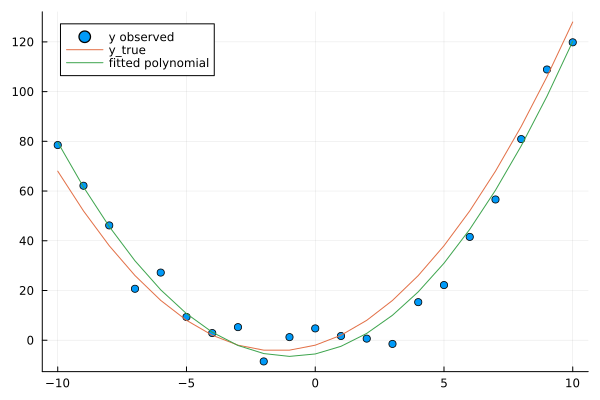

In [18]:
using Plots
using Polynomials: fit, Polynomial, coeffs
scatter(x,y_observed, label="y observed")
plot!(x,y_true, label="y_true")
line_fit = fit(x,y_observed,2)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="fitted polynomial")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

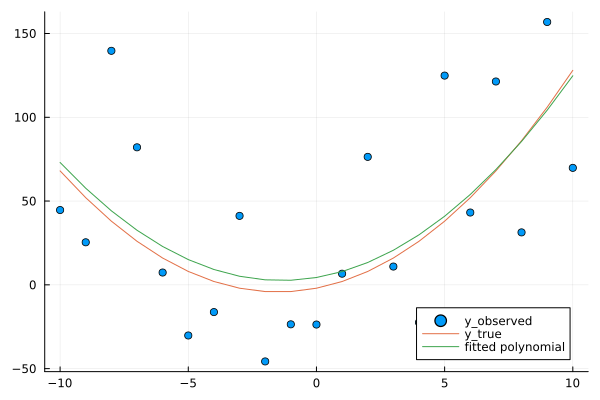

In [31]:
using Random, Distributions
d1 = Normal(0,50)
noise1=rand(d1,length(x))
y_observed = y_true .+ noise1
scatter(x,y_observed, label="y_observed")
plot!(x,y_true, label="y_true")
line_fit = fit(x,y_observed,2)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="fitted polynomial")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

Even though from the graph seems like 2.4 is closer to 2.3, the standard deviation already showed the difference. 2.4 has the std of 50, but 2.3 only have std of 10 which means in 2.3 there should be less error occurs and lead to a closer fit to y_true.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


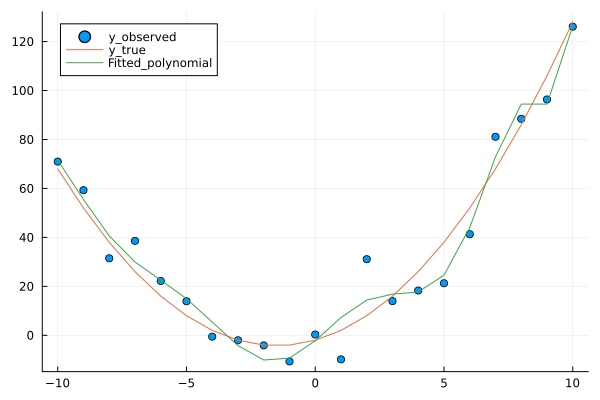

In [36]:
d = Normal(0,10)
noise=rand(d,length(x))
y_observed = y_true .+ noise
scatter(x,y_observed, label="y_observed")
plot!(x,y_true, label="y_true")
line_fit = fit(x,y_observed,10)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="Fitted_polynomial")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


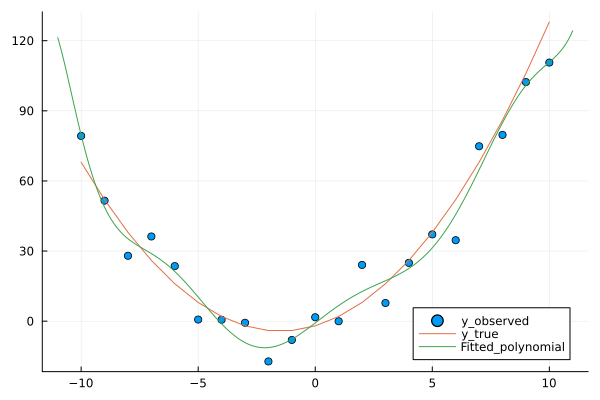

In [39]:
y_true=x.^2 .+3x .-2
d = Normal(0,10)
noise=rand(d,length(x))
y_observed = y_true .+ noise
scatter(x,y_observed, label="y_observed")
plot!(x,y_true, label="y_true")
x_fit=-11:0.1:11
line_fit = fit(x,y_observed,10)
y_fitted = line_fit.(x_fit)
plot!(x_fit,y_fitted, label="Fitted_polynomial")

3. What do you observe in the plot? What is this phenomenon called?

Because it has detected the noise we are applying, the fitted line in this figure passes and curves around several of the observed points. Overfitting is a phenomena where the new parameter is larger than the size of the data. Inaccurate predictions with erroneous correlations or patterns may result from overfitting.